In [26]:
#Importing Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import seaborn as sns


In [61]:
#Reading Capital Markets Data
capital_data=pd.read_excel(open('Canada CM Databank - Q2 2021_Final_4.xlsx','rb'),sheet_name='Valuation Parameters', header=1,engine = 'openpyxl')

In [62]:
#Function that Creates Panel for Dashboard

def create_panel(capital_data):
    #Selecting the initial columns for future processing
    f1 = capital_data.iloc[:, 0:6] 
    #Creating dates out of column names
    Dates_Quarters=capital_data.columns[6:len(capital_data.columns)]
    Dates = pd.to_datetime([f'{x[-4:]}{x[:2]}' for x in Dates_Quarters])
    #Create a Pandas Dataframe with the Dates and size of the new panel
    Dates_pd=pd.DataFrame(Dates)
    Dates_pd.columns=['Dates']
    Dates_column=pd.concat([Dates_pd]*len(f1)).reset_index(drop=True)
    #Create a panel with the first 6 variables, its very imported to sorted by index so I can flip the valus
    Panel=pd.concat([f1]*len(Dates_pd)).sort_index(axis=0)
    Panel=Panel.reset_index(drop=True)
    #Values of the Statistics
    List_of_Rows=[]
    Series=capital_data.iloc[:, 6:]
    for i in range(0,len(Series)):
        list_Series=Series.loc[i].reset_index(drop=True)
        frame=pd.DataFrame(list_Series)
        frame.columns=['Value']
        List_of_Rows.append(frame)
    Values=pd.concat(List_of_Rows)
    Values=Values.reset_index(drop=True)
    # Now we can Concatenate the Dates + Panel + Values
    Result = pd.concat([Dates_column,Panel, Values], axis=1)
    return Result


# Comparison Across Markets - Single Date

In [171]:
#Creating your Panel, always remeber that there is no empty columns on the
my_panel=create_panel(capital_data)

In [127]:
#Configuration, Date & Sector:
Date_of_interest='2021-01-01'
Sector='Office'

#Filter
my_panel=my_panel[my_panel['Sector']==Sector]
my_panel=my_panel[my_panel['Dates']==Date_of_interest]
my_panel['Sub-Type'].unique()

array(['Downtown ', 'Midtown', 'Suburban', 'Overall', 'Downtown'],
      dtype=object)

In [128]:
# List of Parameters : 
my_panel['Parameter'].unique()

array(['Average Net Rent', 'Avg. Sale Price PSF', 'Cap Rate',
       'Contruction Completions (s.f.)', 'Inventory (s.f.)', 'IRR',
       'Net Absorption (s.f.)', 'Sublease Vacancy (s.f.)',
       'Terminal Cap Rate', 'Total Vacancy (s.f.)', 'Vacancy (%)'],
      dtype=object)

In [152]:
#Parameter: Pick of the parameters Below
Parameter='Average Net Rent'
my_panel=my_panel[my_panel['Parameter']==Parameter]

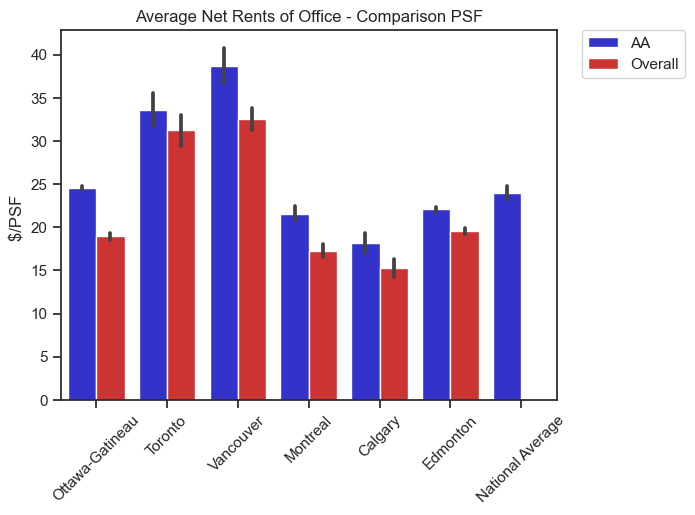

In [201]:
#Comparison across Cities of Single Parameter

import seaborn as sns

# Some boilerplate to initialise things
sns.set_style("ticks")
plt.figure()

#Default
ax = sns.barplot(data=my_panel, x="Market", y="Value", hue="Class",palette=['blue', 'red'], saturation=0.6)

# Customise some display properties
ax.set_title('Average Net Rents of Office - Comparison PSF')
ax.set_ylabel('$/PSF ')
ax.set_xlabel(None)
ax.set_xticklabels(my_panel["Market"].unique().astype(str), rotation=45)


# Ask Matplotlib to show it
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Comparison Across Markets - Time Series

In [195]:
#Creating your Panel, always remeber that there is no empty columns on the
my_panel=create_panel(capital_data)

In [196]:
#Configuration, Dates & Sector:
Start_Date='2015-01-01'
End_Date='2021-01-01'
Sector='Office'

#Filter
my_panel=my_panel[my_panel['Sector']==Sector]
my_panel = my_panel[(my_panel['Dates'] > Start_Date) & (my_panel['Dates'] <= End_Date)]

my_panel['Sub-Type'].unique()


array(['Downtown ', 'Midtown', 'Suburban', 'Overall', 'Downtown'],
      dtype=object)

In [197]:
# List of Parameters : 
my_panel['Parameter'].unique()

array(['Average Net Rent', 'Avg. Sale Price PSF', 'Cap Rate',
       'Contruction Completions (s.f.)', 'Inventory (s.f.)', 'IRR',
       'Net Absorption (s.f.)', 'Sublease Vacancy (s.f.)',
       'Terminal Cap Rate', 'Total Vacancy (s.f.)', 'Vacancy (%)'],
      dtype=object)

In [198]:
#Parameter: Pick of the parameters Below
Parameter='Average Net Rent'
my_panel=my_panel[my_panel['Parameter']==Parameter]

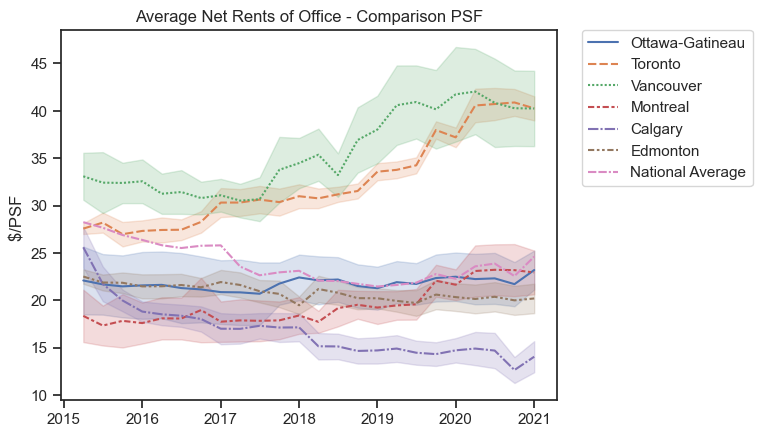

In [200]:
#Comparison across Cities of Single Parameter - Time Series

import seaborn as sns

# Some boilerplate to initialise things
sns.set_style("ticks")
plt.figure()

#Default
ax = sns.lineplot(data=my_panel, x="Dates", y="Value", hue="Market", style="Market")

# Customise some display properties
ax.set_title('Average Net Rents of Office - Comparison PSF')
ax.set_ylabel('$/PSF ')
ax.set_xlabel(None)
#ax.set_xticklabels(my_panel["Dates"].unique().astype(str), rotation=45)


# Ask Matplotlib to show it
#plt.legend(loc='upper right')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Comparison Across Markets - 2 Different Points in Time


In [254]:
#Creating your Panel, In this graph you can configure the start and end date, the type of real estate 
my_panel=create_panel(capital_data)

In [264]:
#Configuration, Date & Sector:
Date_of_interest='2021-01-01'
Sector_1='Office'
Sector_2='Industrial'

#Filter
my_panel=my_panel[my_panel['Sector']==Sector]
my_panel=my_panel[my_panel['Dates']==Date_of_interest]
my_panel['Sub-Type'].unique()

array(['Multi Tenant', 'Overall', 'Single Tenant'], dtype=object)

In [256]:
# List of Parameters : 
my_panel['Parameter'].unique()

array(['Average Net Rent', 'Avg. Sale Price PSF', 'Cap Rate',
       'Inventory (s.f.)', 'Contruction Completions (s.f.)',
       'Total Vacancy (s.f.)', 'IRR', 'Vacancy (%)',
       'Net Absorption (s.f.)', 'Total Availability (s.f.)',
       'Terminal Cap Rate', 'Total Availability (%)',
       'Under Construction (s.f.)'], dtype=object)

In [257]:
#Parameter: Pick of the parameters Below
Parameter='Average Net Rent'
my_panel=my_panel[my_panel['Parameter']==Parameter]
my_panel['Class'].unique()

array(['Overall'], dtype=object)

In [258]:
#Check if Class is Needed or Not
Class='Overall'
my_panel=my_panel[my_panel['Class']==Class]

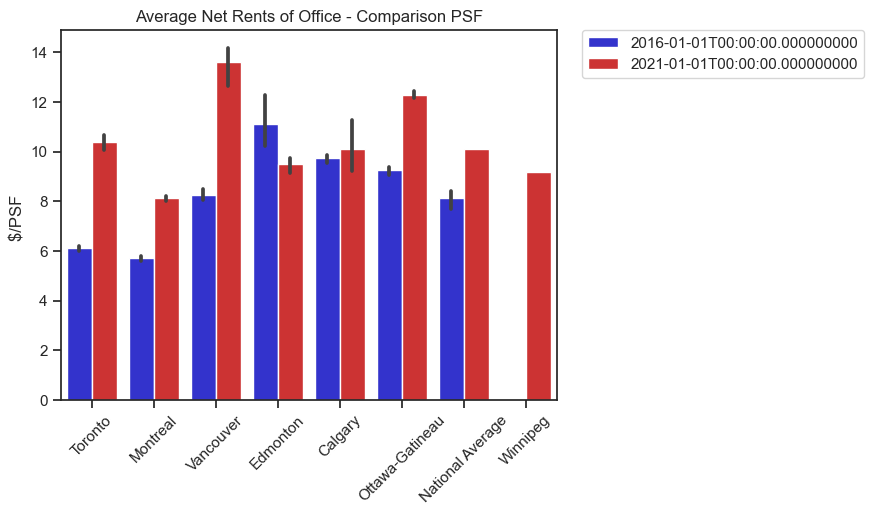

In [259]:
#Comparison across Cities of Single Parameter -Bar Chart

import seaborn as sns

# Some boilerplate to initialise things
sns.set_style("ticks")
plt.figure()

#Default
ax = sns.barplot(data=my_panel, x="Market", y="Value", hue="Dates",palette=['blue', 'red'], saturation=0.6)

# Customise some display properties
ax.set_title('Average Net Rents of Office - Comparison PSF')
ax.set_ylabel('$/PSF ')
ax.set_xlabel(None)
ax.set_xticklabels(my_panel["Market"].unique().astype(str), rotation=45)


# Ask Matplotlib to show it
#plt.legend(loc='upper right')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()